## Image Classifier using ANN

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

In [5]:
tf.__version__

'2.4.1'

#### Importing Dataset from Keras Datasets

In [6]:
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

4423680/4422102 [==============================] - 19s 4us/step


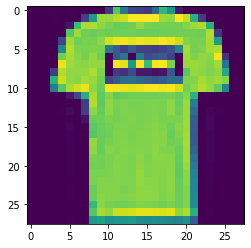

In [16]:
plt.imshow(X_train_full[1]);

In [17]:
y_train_full[1]

0

In [18]:
class_names = ['T-shirt/top', 'Trowser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
class_names[y_train_full[1]]

'T-shirt/top'

In [24]:
# all images are in size 28 pxl X 28 pxl
X_train_full[10].shape

(28, 28)

#### Data Normalization

In [26]:
# Dividing all the pexel density by 255
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

 #### Spliting the Data

In [27]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [29]:
X_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

### Artificial Neural Network Model

In [30]:
# This will give us same result each time
np.random.seed(50)
tf.random.set_seed(50)

#### Building Sequential Model

In [32]:
model = keras.models.Sequential()
# Input Layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# Hidden Layer one
model.add(keras.layers.Dense(300, activation='relu'))
# Hidden Layer Two
model.add(keras.layers.Dense(100, activation='relu'))
# Output Layer
model.add(keras.layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Structure of ANN

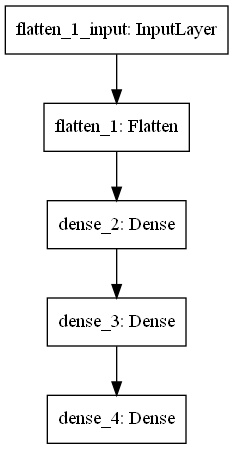

In [35]:
import pydot
keras.utils.plot_model(model)

In [36]:
weights, biases = model.layers[1].get_weights()

In [37]:
weights

array([[ 0.06873053,  0.06446034, -0.02492786, ...,  0.01716027,
         0.05815291, -0.00695643],
       [-0.00841533,  0.05951859, -0.04992184, ...,  0.02497374,
        -0.04218455, -0.0412602 ],
       [ 0.00908687,  0.02612381,  0.03319911, ...,  0.04440377,
         0.05348514,  0.01315603],
       ...,
       [-0.04529859,  0.06884007,  0.01428217, ..., -0.00553549,
         0.01994627,  0.01154252],
       [-0.02287956,  0.0509906 , -0.03202112, ..., -0.03445487,
         0.05983095,  0.01987677],
       [-0.06933811,  0.02752808,  0.05032478, ..., -0.06038208,
         0.04841027, -0.05832199]], dtype=float32)

In [38]:
weights.shape

(784, 300)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
biases.shape

(300,)

#### Compiling and Training the Model

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [42]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0281 - accuracy: 0.6800 - val_loss: 0.5288 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5064 - accuracy: 0.8258 - val_loss: 0.4541 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4523 - accuracy: 0.8408 - val_loss: 0.4389 - val_accuracy: 0.8460
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4205 - accuracy: 0.8514 - val_loss: 0.4053 - val_accuracy: 0.8580
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3969 - accuracy: 0.8588 - val_loss: 0.3974 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3894 - accuracy: 0.8634 - val_loss: 0.3721 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3674 - accuracy: 0.8709 - val_loss: 0.3748 - val_accuracy:

In [43]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [44]:
model_history.history

{'loss': [0.7367306351661682,
  0.49342161417007446,
  0.4472905397415161,
  0.41971108317375183,
  0.40079277753829956,
  0.3829058110713959,
  0.36881139874458313,
  0.3579656481742859,
  0.3467285633087158,
  0.338332861661911,
  0.3290644884109497,
  0.32044243812561035,
  0.31329402327537537,
  0.3064984977245331,
  0.29951775074005127,
  0.2937363386154175,
  0.28762879967689514,
  0.28145238757133484,
  0.27749451994895935,
  0.2717478275299072,
  0.26660001277923584,
  0.26158344745635986,
  0.2568536698818207,
  0.25339069962501526,
  0.24941465258598328,
  0.24492061138153076,
  0.24054892361164093,
  0.23745499551296234,
  0.2342546284198761,
  0.2294122874736786],
 'accuracy': [0.7596545219421387,
  0.8283091187477112,
  0.8436545729637146,
  0.8514545559883118,
  0.857872724533081,
  0.864509105682373,
  0.869527280330658,
  0.8713454604148865,
  0.8759818077087402,
  0.8779454827308655,
  0.8826727271080017,
  0.8849818110466003,
  0.8878545165061951,
  0.8904363512992859

#### Visualizing Model History

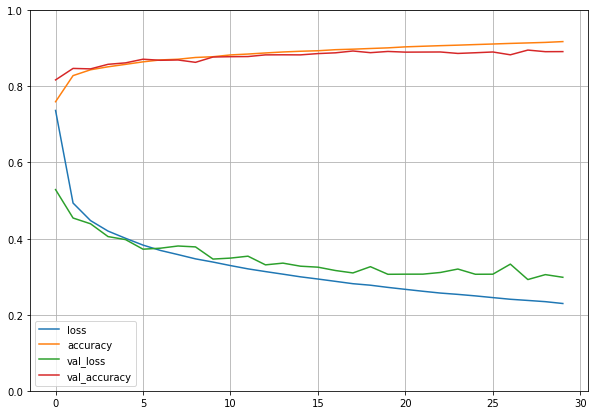

In [45]:
pd.DataFrame(model_history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Evaluating Performance and Prediction

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8745


[0.34532636404037476, 0.8744999766349792]

In [48]:
X_new = X_test[:3]

In [49]:
y_probability = model.predict(X_new)

In [56]:
y_probability.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [54]:
y_pred = model.predict_classes(X_new)
y_pred

D:\Programming\Python\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [55]:
y_pred_1 = np.argmax(model.predict(X_new), axis=-1)
y_pred_1

array([9, 2, 1], dtype=int64)

In [57]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trowser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


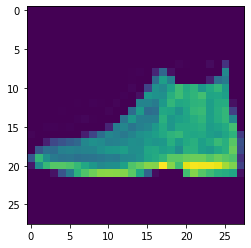

In [58]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


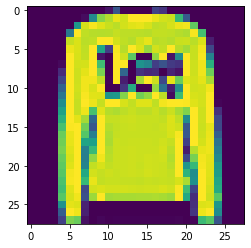

In [59]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


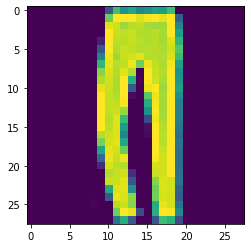

In [60]:
print(plt.imshow(X_test[2]))